In [36]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

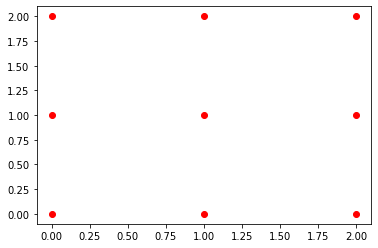

In [55]:
f = 0,0
s = 2,2
xnum_nodes = 3
ynum_nodes = 3
x_nodes = np.linspace(f[0], s[0], xnum_nodes)
y_nodes = np.linspace(f[1], s[1], ynum_nodes)
x_grid, y_grid = np.meshgrid(x_nodes, y_nodes)
plt.plot(x_grid, y_grid, 'ro')

In [57]:
x_nodes = [i%xnum_nodes/(xnum_nodes-1)*(s[0] - f[0]) for i in range(xnum_nodes*ynum_nodes)]
y_nodes = [i//ynum_nodes/(ynum_nodes-1)*(s[0] - f[0]) for i in range(xnum_nodes*ynum_nodes)]
elements = []
for j in range(ynum_nodes-1):
    for i in range(xnum_nodes-1):
        elements.append(i+j*xnum_nodes)
        elements.append(i+1)
        elements.append(i+xnum_nodes+1+j*xnum_nodes)
        elements.append(i+j*xnum_nodes)
        elements.append(i+1+xnum_nodes+j*xnum_nodes)
        elements.append(i+xnum_nodes+j*xnum_nodes)

elements = np.asarray(elements)
elements = elements.reshape(-1,3)
S = (s[0] - f[0]) / (xnum_nodes - 1) * (s[1] - f[1]) / (ynum_nodes - 1) * 0.5

In [61]:
print(elements, x_nodes, y_nodes)

[[0 1 4]
 [0 4 3]
 [1 2 5]
 [1 5 4]
 [3 1 7]
 [3 7 6]
 [4 2 8]
 [4 8 7]] [0.0, 1.0, 2.0, 0.0, 1.0, 2.0, 0.0, 1.0, 2.0] [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0]


In [62]:
E = 2.1 * 10e4
nu = 0.5
D = np.asarray([[1, nu, 0], [nu, 1, 0], [0, 0, (1-nu)/2]])

In [63]:
for el in elements:
    b = [y_nodes[el[(1+i)%3]] - y_nodes[el[(2+i)%3]] for i in range(3)]
    c = [x_nodes[el[(2+i)%3]] - x_nodes[el[(1+i)%3]] for i in range(3)]
    B = np.asarray([[b[0], 0, b[1], 0 ,b[2], 0],
         [0, c[0], 0, c[1], 0, c[2]],
         [c[0], b[0], c[1], b[1], c[2], b[2]]])/(2*S)
    print(B)
    

[[-1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  1.]
 [ 0. -1. -1.  1.  1.  0.]]
[[ 0.  0.  1.  0. -1.  0.]
 [ 0. -1.  0.  0.  0.  1.]
 [-1.  0.  0.  1.  1. -1.]]
[[-1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  1.]
 [ 0. -1. -1.  1.  1.  0.]]
[[ 0.  0.  1.  0. -1.  0.]
 [ 0. -1.  0.  0.  0.  1.]
 [-1.  0.  0.  1.  1. -1.]]
[[-2.  0.  1.  0.  1.  0.]
 [ 0.  0.  0. -1.  0.  1.]
 [ 0. -2. -1.  1.  1.  1.]]
[[ 0.  0.  1.  0. -1.  0.]
 [ 0. -1.  0.  0.  0.  1.]
 [-1.  0.  0.  1.  1. -1.]]
[[-2.  0.  1.  0.  1.  0.]
 [ 0.  0.  0. -1.  0.  1.]
 [ 0. -2. -1.  1.  1.  1.]]
[[ 0.  0.  1.  0. -1.  0.]
 [ 0. -1.  0.  0.  0.  1.]
 [-1.  0.  0.  1.  1. -1.]]
